# Examples for WIMpy_NREFT

This is an example file to go with the `WIMpy_NREFT` code, available [here](https://github.com/bradkav/WIMpy_NREFT). The main functions are in `DMUtils.py`, which is loaded like this:

In [1]:
import DMUtils as DMU

#We'll also import some useful libraries
import numpy as np
import matplotlib.pyplot as pl

import matplotlib as mpl

font = {'family' : 'sans-serif',
        'size'   : 16}

mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rc('font', **font)

from tqdm import tqdm

### Differential recoil rate

Before we calculate the differential recoil rate $\mathrm{d}R/\mathrm{d}E_R$, we have to specify the couplings. We do this by defining two vectors of couplings: 1 for the couplings to protons and 1 for the couplings to neutrons. Each vector should have 11 elements (one entry for each of the 11 NREFT operators - note that $\mathcal{O}_2$ is set to zero by default, but we keep 11 entries so that the numbering matches): 

In [2]:
#Initialise the empty vectors
cp = np.zeros(11)
cn = np.zeros(11)

### Spin-independent interactions

Let's start with the standard spin-independent interaction (so we want to set the first element $\mathcal{O}_1$, noting that the numbering of arrays starts from zero in python):

In [3]:
cp[0] = 1e-9
cn[0] = 1e-9
print("Couplings to protons [GeV^{-2}]:", cp)
print("Couplings to neutrons [GeV^{-2}]:", cn)

('Couplings to protons [GeV^{-2}]:', array([  1.00000000e-09,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00]))
('Couplings to neutrons [GeV^{-2}]:', array([  1.00000000e-09,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00]))


**Note that the couplings in the NREFT are *dimensionful* and should have units of GeV$^{-2}$**.

Now let's calculate the differential spectrum for a DM particle of mass 100 GeV:

In [4]:
m_x = 100 #DM mass in GeV

A_Xe = 131.
N_p_Xe = 54.
N_n_Xe = 131 - N_p_Xe

sig = DMU.coupling_to_xsec(cp[0], m_x)

E_list = np.logspace(-3, 2,1000)

R_SI = DMU.dRdE_standard(E_list, N_p_Xe, N_n_Xe, m_x, sig)
R_SI_NREFT = DMU.dRdE_NREFT(E_list, m_x, cp, cn, "Xe131") 

Now let's plot the result, which will be in units of keV$^{-1}$ kg$^{-1}$ day$^{-1}$:

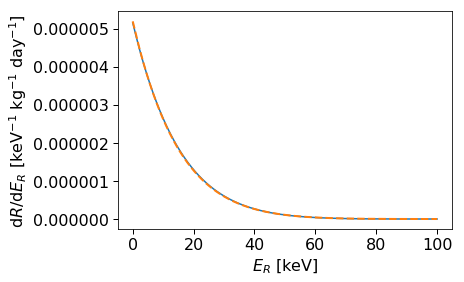

In [5]:
pl.figure(figsize=(6,4))

pl.plot(E_list, R_SI, label="Standard SI")
pl.plot(E_list, R_SI_NREFT, '--', lw=2.0, label=r'$\mathcal{O}_1$')
pl.xlabel(r'$E_R$ [keV]')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')

pl.show()

### Random NREFT spectra

Now let's try something more exotic. Let's just take some random values for all the couplings to protons and neutrons (setting the couplings to$\mathcal{O}_1$ to zero):

In [6]:
cp_random = np.random.randn(11)
cn_random = np.random.randn(11)
cp_random[0] = 0
cn_random[0] = 0
print("Couplings to protons [GeV^{-2}]:", cp_random)
print("Couplings to neutrons [GeV^{-2}]:", cn_random)

('Couplings to protons [GeV^{-2}]:', array([ 0.        , -0.70847017,  0.17980778, -0.45307177, -0.02004009,
        0.02990111, -0.17904061, -0.08042629,  0.31109563,  0.58900236,
       -0.96261791]))
('Couplings to neutrons [GeV^{-2}]:', array([ 0.        , -0.10245752, -0.5329995 ,  1.36604619, -0.14669218,
        0.03099274,  0.73130894, -0.10187099, -0.32020765,  0.23693471,
       -0.60728475]))


Now let's plot a bunch of different random spectra:

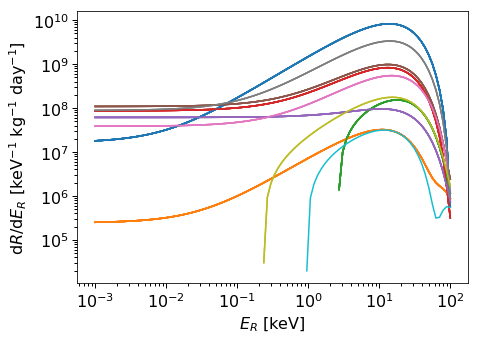

In [7]:
E_list = np.logspace(-3, 2,100)
R_random = np.zeros((len(E_list), 10))

pl.figure(figsize=(7,5))

for i in range(10):
    cp_random = np.random.randn(11)
    cn_random = np.random.randn(11)
    cp_random[0] = 0
    cn_random[0] = 0
    
    R_random[:,i] = DMU.dRdE_NREFT(E_list, m_x, cp_random, cn_random, "Xe131") 
    pl.loglog(E_list, R_random)
    
pl.xlabel(r'$E_R$ [keV]')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')
pl.show()

### Comparing $\mathcal{O}_1$ and $\mathcal{O}_4$

Now we take a look at the spectra for $\mathcal{O}_1$ and $\mathcal{O}_4$ (standard spin-independent and spin-dependent interactions):

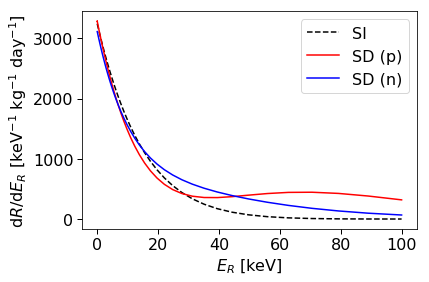

In [8]:
cp_SI = np.zeros(11)
cp_SI[0] = 2.5e-5

cn_SI = 1.0*cp_SI

cp_SD = np.zeros(11)
cp_SD[3] = 1.0

cn_SD = np.zeros(11)
cn_SD[3] = 2.5e-2


pl.figure()

pl.plot(E_list, DMU.dRdE_NREFT(E_list, m_x, cp_SI, cn_SI, "Xe131"),'k--' , lw=1.5,label ='SI')
pl.plot(E_list, DMU.dRdE_NREFT(E_list, m_x, cp_SD, 0.0*cp_SD, "Xe131"),'r-' , lw=1.5,label ='SD (p)')
pl.plot(E_list, DMU.dRdE_NREFT(E_list, m_x, 0.0*cn_SD, cn_SD, "Xe131"),'b-' , lw=1.5,label ='SD (n)')
pl.xlabel(r'$E_R$ [keV]')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')
#pl.title('Random NREFT interactions')

pl.legend(loc='best',fancybox = True)
pl.show()

### Event Rates

You can also calculate the total number of events, using `Nevents_NREFT`. You have to specify a minimum and maximum energy, and you can also specify an efficiency function (i.e. the efficiency of the detector as a function of recoil energy) which multiplies the recoil rate:

In [9]:
Emin = 5 #keV
Emax = 50 #keV

#Just some made-up efficiency function
def efficiency(E_R):
    return 0.5/(1 + np.exp(-E_R))

In [10]:
print("Number of signal events per day per kg of target mass:")
print(DMU.Nevents_NREFT(Emin, Emax,  m_x, cp_random, cn_random,"Xe131"))

Number of signal events per day per kg of target mass:
740460290.976


/usr/local/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


### Specific Interactions

Let's look at a few specific interactions. In particular, we look at **millicharged DM**, with millicharge $\epsilon$:

$$ \mathcal{L} \supset \epsilon \overline{\chi}\gamma_\mu \chi\,A^\mu\,,$$

Dark Matter which has a **magnetic dipole moment** $\mu_\chi$:

$$ \mathcal{L} \supset\frac{\mu_\chi}{2}\overline{\chi}\sigma^{\mu \nu} \chi \,F_{\mu\nu}\,,$$

and Dark Matter which has an **anapole moment** $c_A$:

$$ \mathcal{L} \supset c_A \overline{\chi}\gamma^\mu\gamma^5\chi\,\partial^\nu F_{\mu\nu}\,.$$



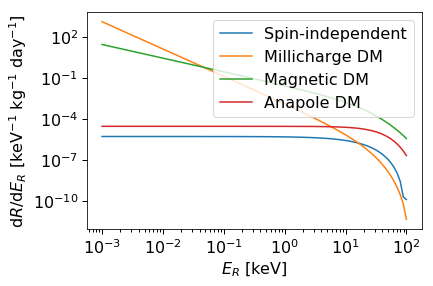

In [19]:
E_list = np.logspace(-3, 2,100)

mu_x = 1e-8 # in units of the Bohr Magneton
eps = 1e-10 #in units of the electron charge
c_A = 1e-5 #in units of GeV^-2

m_x = 100

sig = 1e-46

pl.figure(figsize=)
pl.loglog(E_list, DMU.dRdE_standard(E_list, N_p_Xe, N_n_Xe, m_x, sig), lw=1.5, label='Spin-independent')
pl.loglog(E_list, DMU.dRdE_millicharge(E_list, m_x, eps, "Xe131"), lw=1.5, label='Millicharge DM')
pl.loglog(E_list, DMU.dRdE_magnetic(E_list, m_x, mu_x, "Xe131"), lw=1.5, label='Magnetic DM')
pl.loglog(E_list, DMU.dRdE_anapole(E_list, m_x, c_A, "Xe131"), lw=1.5, label='Anapole DM')

pl.xlabel(r'$E_R$ [keV]')
pl.ylabel(r'$\mathrm{d}R/\mathrm{d}E_R$ [keV$^{-1}$ kg$^{-1}$ day$^{-1}$]')
pl.legend(loc = 'best')
pl.show()